# TikTok influencer prediction with TensorFlow

This is a basic prototype for Sprint 1

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

### Features
We're still working on the data pipeline for accessing the TikTok API and scraping data, so we're currently working with synthetically generated data to prototype the machine learning models. As a start, we use statistics like the length of the video, number of shares, number of followers, and a popularity score for the song. We use placeholder data for these features, drawn from a Gaussian distribution.

### Targets
A good target for prediction could be the number of likes that a video receives. In future sprints, it's also possible to predict multiple target values at a time. These values are predicted by fitting a machine learning model on the mapping from features to targets.


In [2]:
dataset_size = 2048

features = [
    'video_length',
    'shares',
    'followers',
    'song_popularity',
]

targets = [
    'likes',
]

input_dim = len(features)
output_dim = len(targets)

train_inputs = np.random.normal(size=[dataset_size, input_dim])
train_labels = np.random.normal(size=[dataset_size, output_dim])

In this prototype version, the features and targets for machine learning are synthetically generated by drawing from a Gaussian distribution with mean 0.0 and variance 1.0. We use this as placeholder data for the prototype model because we're still working on the data pipeline to collect an actual dataset. In future sprints, this data will be replaced with real data downloaded from the TikTok API.

(array([  8.,  43., 160., 377., 523., 542., 274.,  89.,  29.,   3.]),
 array([-3.28277108, -2.59397699, -1.90518289, -1.2163888 , -0.52759471,
         0.16119939,  0.84999348,  1.53878757,  2.22758167,  2.91637576,
         3.60516985]),
 <BarContainer object of 10 artists>)

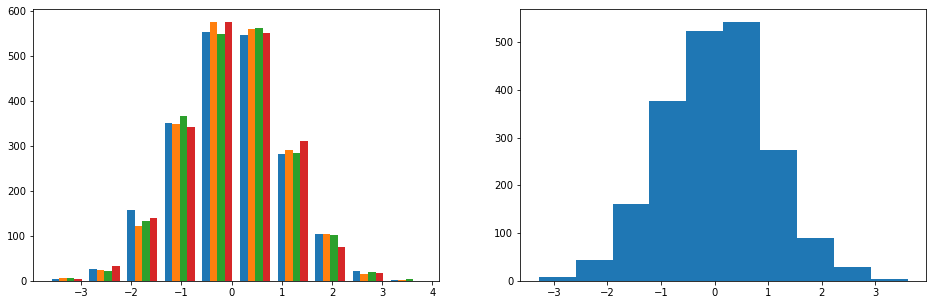

In [3]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
axes[0].hist(train_inputs)
axes[1].hist(train_labels)

### Model
We use a simple feedforward neural network with 2 fully-connected layers, a hidden dimensionality of 64, and a ReLU activation function. This model might be overkill for mapping 4 features to 1 input, but it's subject to change in future sprints, once we are able to work with the real target dataset.

In [4]:
hidden_dim = 64

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(hidden_dim, input_shape=(input_dim,)),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Dense(output_dim),
])

### Training
Here's some simple demo code for training the neural network. We use an Adam optimizer with a learning rate of 0.001 to minimize the mean squared error (MSE) when predicting the number of likes for a given video.

In [5]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(1e-3),
    loss = tf.keras.losses.MeanSquaredError(),
    metrics = [tf.keras.metrics.RootMeanSquaredError()],
)

In [6]:
model.fit(x=train_inputs, y=train_labels)

64/64 [==============================] - 3s 5ms/step - loss: 1.0102 - root_mean_squared_error: 1.0051
